In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import  train_test_split
from sklearn.metrics import confusion_matrix,mean_squared_error
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler,LabelEncoder

%matplotlib inline

In [70]:
df=pd.read_csv('train_set.csv')
df.head()


,Year,OGC,OG,DC,Dept,UC,Union,JF,Job,EI,Salaries,Overtime,H/D,YT,Total_Compensation
0,2015,4,Community Health,DPH,Public Health,250,"SEIU - Health Workers, Local 1021",Med Therapy & Auxiliary,Morgue Attendant,6725,12196,0,0.00,Calendar,16158
1,2013,4,Community Health,DPH,Public Health,39,"Stationary Engineers, Local 39",Journeyman Trade,Stationary Engineer,25058,74639,2820,12703.31,Fiscal,115784
2,2015,6,General Administration & Finance,ASR,Assessor/Recorder,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Appraisal & Taxation,Senior Real Property Appraiser,46108,100554,0,12424.50,Calendar,144708
3,2016,1,Public Protection,POL,Police,911,Police Officers' Association,Police Services,Sergeant 3,33369,140164,52754,13043.87,Fiscal,242323
4,2013,2,"Public Works, Transportation & Commerce",HHP,PUC Hetch Hetchy,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Engineer-Journey,28684,58813,0,7655.28,Calendar,82106


In [12]:
df.dtypes

Year                    int64
OGC                     int64
OG                     object
DC                     object
Dept                   object
UC                      int64
Union                  object
JF                     object
Job                    object
EI                      int64
Salaries                int64
Overtime                int64
H/D                   float64
YT                     object
Total_Compensation      int64
dtype: object

In [25]:
df['Union'].unique().size

72

In [4]:
df.shape

(287836, 15)

In [5]:
df.isnull().sum()

Year                   0
OGC                    0
OG                     0
DC                     0
Dept                   0
UC                     0
Union                 36
JF                    38
Job                    0
EI                     0
Salaries               0
Overtime               0
H/D                    0
YT                     0
Total_Compensation     0
dtype: int64

In [39]:
df.fillna('Other',inplace=True)
df.drop_duplicates()
df.head()


,Year,OGC,OG,DC,Dept,UC,Union,JF,Job,EI,Salaries,Overtime,H/D,YT,Total_Compensation
0,2015,4,Community Health,DPH,Public Health,250,"SEIU - Health Workers, Local 1021",Med Therapy & Auxiliary,Morgue Attendant,6725,12196,0,0.00,Calendar,16158
1,2013,4,Community Health,DPH,Public Health,39,"Stationary Engineers, Local 39",Journeyman Trade,Stationary Engineer,25058,74639,2820,12703.31,Fiscal,115784
2,2015,6,General Administration & Finance,ASR,Assessor/Recorder,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Appraisal & Taxation,Senior Real Property Appraiser,46108,100554,0,12424.50,Calendar,144708
3,2016,1,Public Protection,POL,Police,911,Police Officers' Association,Police Services,Sergeant 3,33369,140164,52754,13043.87,Fiscal,242323
4,2013,2,"Public Works, Transportation & Commerce",HHP,PUC Hetch Hetchy,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Engineer-Journey,28684,58813,0,7655.28,Calendar,82106


In [41]:
df[df['JF']=='Other'].shape

(38, 15)

In [71]:
df1=df.copy()

In [72]:
dummy_OG=pd.get_dummies(df['OG'])
dummy_DC=pd.get_dummies(df['DC'])
dummy_Union=pd.get_dummies(df['Union'])
dummy_JF=pd.get_dummies(df['JF'])
df.drop(columns=['OG','OGC','Dept','UC','Union','JF','Job','EI'],axis=1,inplace=True)
encoder=LabelEncoder()
df['YT']=encoder.fit_transform(df['YT'])
df=pd.merge(df,dummy_OG,left_index=True,right_index=True)
df=pd.merge(df,dummy_DC,left_index=True,right_index=True)
df=pd.merge(df,dummy_Union,left_index=True,right_index=True)
df=pd.merge(df,dummy_JF,left_index=True,right_index=True)


In [73]:
df.drop('DC',axis=1,inplace=True)

c:\Users\91805\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total_Compensation', ylabel='Density'>

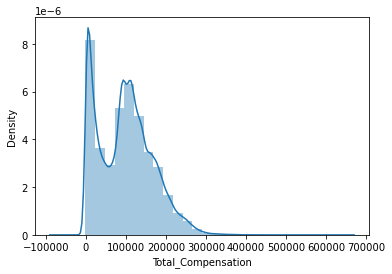

In [87]:
sns.distplot(df['Total_Compensation'],bins=30)

In [85]:
print(df.shape)
df.head()

(287836, 195)


,Year,Salaries,Overtime,H/D,YT,Community Health,Culture & Recreation,General Administration & Finance,General City Responsibilities,Human Welfare & Neighborhood Development,...,Recreation,Revenue,SF Redevelopment Agency,SF Superior Court,Semi-Skilled & General Labor,Skilled Labor,Street Transit,Sub-Professional Engineering,Supervisory-Labor & Trade,Total_Compensation
0,2015,12196,0,0.00,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16158
1,2013,74639,2820,12703.31,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,115784
2,2015,100554,0,12424.50,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,144708
3,2016,140164,52754,13043.87,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,242323
4,2013,58813,0,7655.28,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,82106


In [75]:
x1=df.pop('Total_Compensation')

KeyError: "['Total_Compensation'] not found in axis"

In [79]:
df['Total_Compensation']=x1

In [81]:
df.head()

,Year,Salaries,Overtime,H/D,YT,Community Health,Culture & Recreation,General Administration & Finance,General City Responsibilities,Human Welfare & Neighborhood Development,...,Recreation,Revenue,SF Redevelopment Agency,SF Superior Court,Semi-Skilled & General Labor,Skilled Labor,Street Transit,Sub-Professional Engineering,Supervisory-Labor & Trade,Total_Compensation
0,2015,12196,0,0.00,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16158
1,2013,74639,2820,12703.31,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,115784
2,2015,100554,0,12424.50,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,144708
3,2016,140164,52754,13043.87,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,242323
4,2013,58813,0,7655.28,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,82106


In [89]:
scalar=StandardScaler()
A=scalar.fit_transform(df)
x=A[:,0:194]
y=A[:,194]


In [90]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=5)


In [91]:
K=range(1,15)
k_score=[]
for k in K:
    knn=KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    score=np.sqrt(mean_squared_error(y_test,y_pred))
    k_score.append(score)

    



0.1852108241749893


In [94]:
print(k_score)


[0.1561573775959932, 0.14846850257532573, 0.14722398273442397, 0.14838066815809275, 0.15264292835582494, 0.15621606934977003, 0.16069537199832942, 0.16490623997792822, 0.16874860595547306, 0.17204597260247267, 0.17515173606610376, 0.17797239333379394, 0.18147031777274122, 0.1852108241749893]


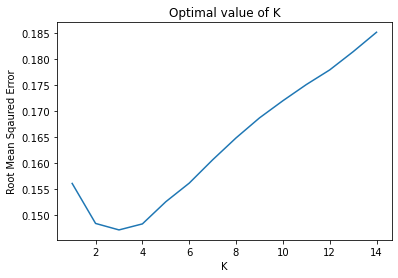

In [95]:
plt.plot(K,k_score)
plt.title('Optimal value of K')
plt.xlabel('K')
plt.ylabel('Root Mean Sqaured Error')
plt.show()


In [98]:
y=df['Total_Compensation']

In [2]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=5)


NameError: name 'train_test_split' is not defined

In [ ]:
knn=KNeighborsRegressor(n_neighbors=3)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

# mse
mse= mean_squared_error(y_test,y_pred)
print(mse)

99488865.47098182


In [102]:
print(y_pred)

(43176,)


In [97]:
print(y_test)

[ 0.07648233  0.19651202 -0.1828686  ...  0.37025396  1.24398215
  0.78582652]
